# Numpy & Pandas in Python
author: ZeXu.Zheng
<br>
email: <andyzheng_123@outlook.com>

In this lecture, we are going to explore the usage of Numpy and Pandas packages in Python. Both of them are powerful tools when dealing with conplex data processing target. Good luck!

首先，使用命令行安装Numpy和Pandas，<br>
```
pip install numpy 
pip install pandas
```

## Numpy

In [1]:
import numpy as np

Numpy是python进行数值计算的一个基础包，很多提供科学计算功能的包都是基于Numpy构建的，了解Numpy处理数据的方式有助于我们快速理解Python的数据处理机制。

### Why Numpy?

- FASTER, numpy的基础算法是基于C语言的，计算速度快；数组运算可以减少循环的数量
- CLEARER, 避免写loop使代码更加清晰，形式上更接近需要计算的公式

### Array in Numpy

ndarray是Numpy提供的一种N维数组容器，我们可以使用它进行数学运算，语法与标量(scalar)元素之间的运算一致。

In [2]:
data1 = np.random.randn(2,3) #生成一个两行三列的随机数组
data2 = np.random.randn(2,3)
data3 = np.random.randn(3,2)
data1.dtype #数组的属性
data1.shape #数组形状

(2, 3)

大小相等的数组之间的任何算术运算都会将该运算应用到元素级。

In [3]:
data1 + data2 #逐元素相加

array([[ 1.08953596, -0.52046108,  0.44197034],
       [-0.55431416, -1.08294087,  1.43371339]])

In [4]:
data1 * data2 #逐元素相乘

array([[-0.19942704,  0.04354235, -0.01908839],
       [-0.05432761, -0.20750975,  0.14669905]])

数组与标量之间的算术运算会将标量值传播到各个元素。

In [5]:
data1 * 10 #逐元素乘10

array([[-1.59646098, -1.04739106, -0.39634937],
       [ 0.84980538,  1.66131132,  1.10899214]])

In [6]:
1 / data1

array([[ -6.26385493,  -9.5475323 , -25.23026615],
       [ 11.76740015,   6.01934139,   9.01719644]])

In [7]:
data1 ** 2

array([[0.02548688, 0.01097028, 0.00157093],
       [0.00722169, 0.02759955, 0.01229864]])

In [8]:
data1 > data2 #两个shape相同的数组之间可以进行大小比较

array([[False,  True, False],
       [ True,  True, False]])

就矩阵运算而言，Numpy亦提供点乘和转置操作。

In [9]:
np.dot(data1, data3) #点乘

array([[-0.11647839, -0.05077237],
       [ 0.22830889, -0.07874177]])

In [10]:
print(data1.shape)
data1t = data1.T #转置
print(data1t.shape)

(2, 3)
(3, 2)


### 从现有数据创建ndarray

与List可以装载多种类型的数据不同，ndarray中的数据类型必须统一。

In [11]:
d1 = [1, 2, 3, 4]
a1 = np.array(d1)
print(a1.dtype)
d2 = [1, 2, 3, 4.1]
a2 = np.array(d2)
print(a2.dtype)

int32
float64


上例中，d1和d2两个列表只有最后一个元素不同。d1中的元素全部都是int整型，而d2中-1位置上的元素为float浮点数。由于ndarray中数据类型需要统一，Numpy自动为a2中的数据都赋成了float类型。

In [12]:
d3 = [[1,2,3,4],
     [5,6,7,8]]
a3 = np.array(d3)
print(a3.ndim)
print(a3.shape)

2
(2, 4)


In [13]:
np.zeros(10) #生成元素全为零的1*10数组

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [14]:
np.zeros((2,3))

array([[0., 0., 0.],
       [0., 0., 0.]])

In [15]:
np.ones((3,3))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

### 索引和切片

In [16]:
arr = np.arange(10) #形同range（10），但返回的不是一个列表，而是ndarray对象。
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [17]:
print(arr[5])
print(arr[5:8])
arr[-1] = 12
print(arr)

5
[5 6 7]
[ 0  1  2  3  4  5  6  7  8 12]


注意，修改数组的一个切片中元素的值也会影响到初始的数组。

In [19]:
arr_slice = arr[5:8]
arr_slice

array([5, 6, 7])

In [20]:
print(arr)
arr_slice[1] = 12
print(arr_slice)
print(arr)

[ 0  1  2  3  4  5  6  7  8 12]
[ 5 12  7]
[ 0  1  2  3  4  5 12  7  8 12]


如果要避免这种情况出现，需要使用copy方法，这使我们可以安全地对数据进行修改。

In [21]:
arr = np.arange(10)
print(arr)
arr_slice = arr[5:8].copy()
print(arr_slice)
arr_slice[1] = 12
print(arr_slice)
print(arr)

[0 1 2 3 4 5 6 7 8 9]
[5 6 7]
[ 5 12  7]
[0 1 2 3 4 5 6 7 8 9]


#### 二维数组的切片和索引

In [22]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d[1] #取出arr2d的第二行

array([4, 5, 6])

In [23]:
#两种从二维数组中取数据的方式
print(arr2d[1][0])
print(arr2d[1,0])

4
4


In [24]:
arr2d[:2] #选取axis = 0的前两行 

array([[1, 2, 3],
       [4, 5, 6]])

In [25]:
arr2d[:2,1:] #axis = 0的前两行和axis = 1的后两列

array([[2, 3],
       [5, 6]])

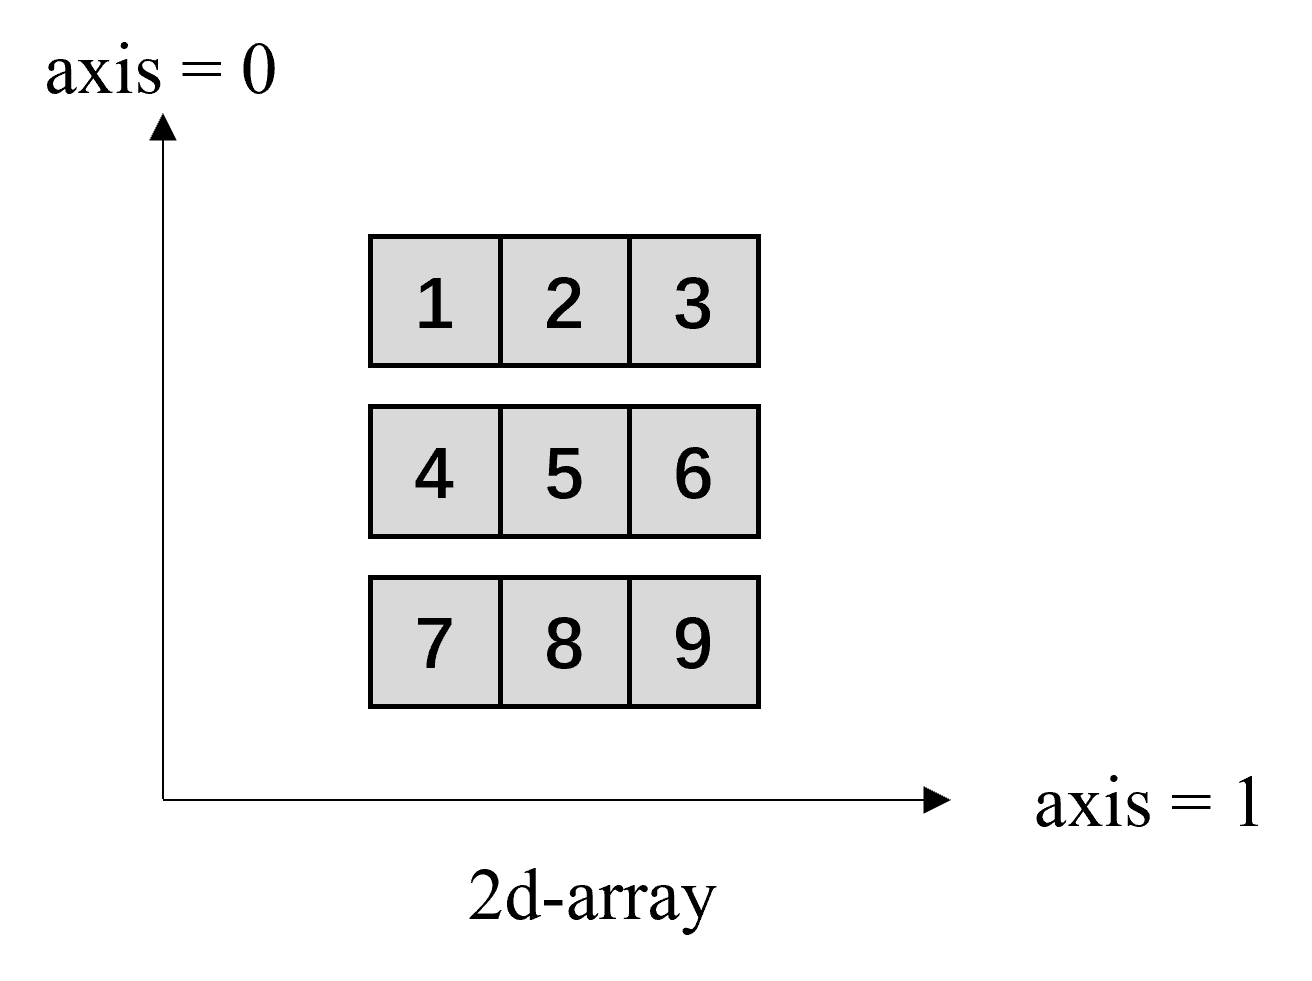

In [26]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [27]:
arr3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

In [28]:
arr3d[0] = 12
arr3d

array([[[12, 12, 12],
        [12, 12, 12]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [29]:
print(arr3d[1])
print(arr3d[1,1])
print(arr3d[1,1,1])

[[ 7  8  9]
 [10 11 12]]
[10 11 12]
11


In [30]:
arr3d[1,1:]

array([[10, 11, 12]])

In [31]:
arr3d[1,1:,:2]

array([[10, 11]])

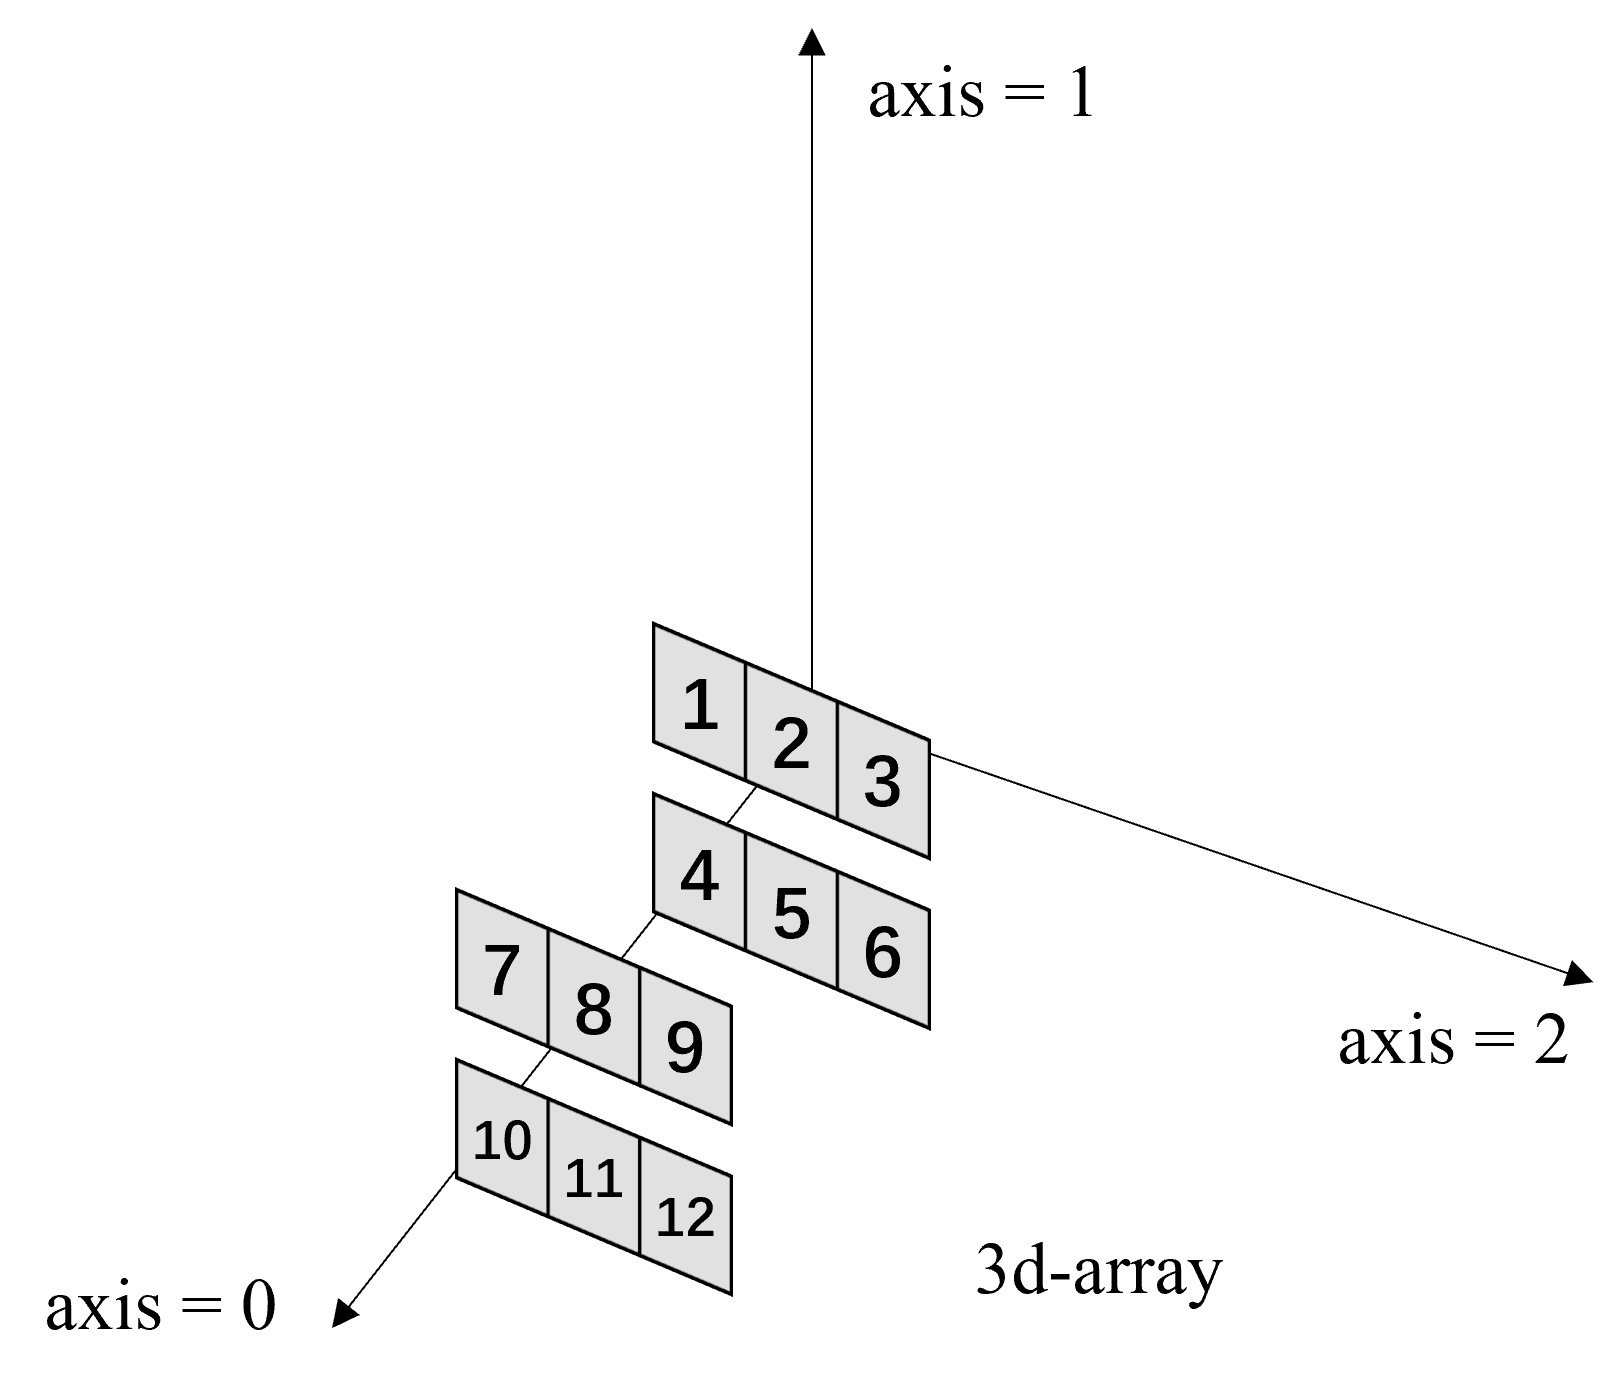

## Pandas

In [1]:
import pandas as pd

Pandas提供了两个主要的数据结构，Series和DataFrame。Series是一种带标签（label）的一维数组。轴上的label被统一称为index，注意label可以有重复。我们可以将Series视为Excel数据表中的一列。DataFrame是一种二维数组，每一个数据元素都有两个标签（列标签、行标签）。

### Series

In [2]:
s = pd.Series([4, 7, -5, 3]) #在没有指定索引的情况下，pandas会自动分配数字索引
s

0    4
1    7
2   -5
3    3
dtype: int64

In [3]:
s1 = pd.Series([4, 7, -5, 3], index = ['a','b','c','d'])
s1

a    4
b    7
c   -5
d    3
dtype: int64

In [4]:
print(s1.values)
print(s1.index)

[ 4  7 -5  3]
Index(['a', 'b', 'c', 'd'], dtype='object')


In [5]:
s1['a'] #通过索引访问Series中的数值
s1[['a','b']]

a    4
b    7
dtype: int64

通过索引值访问Series的方式跟字典很像，可以将其视为一个定长的有序字典（注意，字典类型是无序的，不能用位置参数访问元素）。

In [6]:
'a' in s1

True

In [7]:
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
s2 = pd.Series(sdata) #使用字典创建Series
s2

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

我们也可以对Series对象及其索引添加name属性。

In [8]:
s2.name = 'Population' #为Series对象添加name
s2.index.name = 'state' #为索引添加name
s2

state
Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
Name: Population, dtype: int64

Series中的很多运算都跟Numpy十分类似。

In [9]:
s1[s1 > 0] #布尔值索引

a    4
b    7
d    3
dtype: int64

In [10]:
s1 * 2

a     8
b    14
c   -10
d     6
dtype: int64

Series的一个重要功能是自动(按index)对齐，见下例。

In [11]:
s2 = pd.Series([1, 2, 3, 4], index = ['b','d','a','c'])
s2

b    1
d    2
a    3
c    4
dtype: int64

In [12]:
s1

a    4
b    7
c   -5
d    3
dtype: int64

In [13]:
s1 + s2

a    7
b    8
c   -1
d    5
dtype: int64

### DataFrame

DataFrame是一个表格型的数据结构，其包含一组有序的列，每列可以是不同的数值类型。我们可以对每行/列进行选、删、增、改的操作。我们可以从等长字典创建DataFrame，也可以从外部文件中读入DataFrame.

In [14]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002, 2003],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
frame = pd.DataFrame(data) #从等长字典创建DataFrame
frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


In [24]:
nba_info = pd.read_csv("nba.csv", index_col ="Name")

In [25]:
nba_info

,Team,Number,Position,Age,Height,Weight,College,Salary
Name,,,,,,,,
Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0
...,...,...,...,...,...,...,...,...
Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333.0
Raul Neto,Utah Jazz,25.0,PG,24.0,6-1,179.0,NaN,900000.0
Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,NaN,2900000.0


In [26]:
nba_info.head() #从DataFrame第一行起取前五行
nba_info.tail() #从DataFrame最后一行起取后五行

,Team,Number,Position,Age,Height,Weight,College,Salary
Name,,,,,,,,
Shelvin Mack,Utah Jazz,8.0,PG,26.0,6-3,203.0,Butler,2433333.0
Raul Neto,Utah Jazz,25.0,PG,24.0,6-1,179.0,NaN,900000.0
Tibor Pleiss,Utah Jazz,21.0,C,26.0,7-3,256.0,NaN,2900000.0
Jeff Withey,Utah Jazz,24.0,C,26.0,7-0,231.0,Kansas,947276.0
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
nba_info.columns #查询所有的列标签

Index(['Team', 'Number', 'Position', 'Age', 'Height', 'Weight', 'College',
       'Salary'],
      dtype='object')

#### 列/行选择

我们可以直接使用列名对DataFrame中一列存储的数据进行访问。

In [29]:
nba_info['Team'] #使用列名访问列

Name
Avery Bradley    Boston Celtics
Jae Crowder      Boston Celtics
John Holland     Boston Celtics
R.J. Hunter      Boston Celtics
Jonas Jerebko    Boston Celtics
                      ...      
Shelvin Mack          Utah Jazz
Raul Neto             Utah Jazz
Tibor Pleiss          Utah Jazz
Jeff Withey           Utah Jazz
NaN                         NaN
Name: Team, Length: 458, dtype: object

In [31]:
nba_info[['Position','Height']]

,Position,Height
Name,,
Avery Bradley,PG,6-2
Jae Crowder,SF,6-6
John Holland,SG,6-5
R.J. Hunter,SG,6-5
Jonas Jerebko,PF,6-10
...,...,...
Shelvin Mack,PG,6-3
Raul Neto,PG,6-1
Tibor Pleiss,C,7-3


行的访问相对复杂，Pandas提供了`DataFrame.loc[]`方法和`DataFrame.iloc[]`方法对行进行访问，注意，这两种方式也适用于对列的访问。

In [34]:
nba_info.loc['Raul Neto'] #使用行标签访问

Team        Utah Jazz
Number           25.0
Position           PG
Age              24.0
Height            6-1
Weight          179.0
College           NaN
Salary       900000.0
Name: Raul Neto, dtype: object

In [36]:
nba_info.loc[:,'Team']

Name
Avery Bradley    Boston Celtics
Jae Crowder      Boston Celtics
John Holland     Boston Celtics
R.J. Hunter      Boston Celtics
Jonas Jerebko    Boston Celtics
                      ...      
Shelvin Mack          Utah Jazz
Raul Neto             Utah Jazz
Tibor Pleiss          Utah Jazz
Jeff Withey           Utah Jazz
NaN                         NaN
Name: Team, Length: 458, dtype: object

In [35]:
nba_info.iloc[0] #使用行所在的位置访问

Team        Boston Celtics
Number                 0.0
Position                PG
Age                   25.0
Height                 6-2
Weight               180.0
College              Texas
Salary           7730337.0
Name: Avery Bradley, dtype: object

In [38]:
nba_info.iloc[:,0]

Name
Avery Bradley    Boston Celtics
Jae Crowder      Boston Celtics
John Holland     Boston Celtics
R.J. Hunter      Boston Celtics
Jonas Jerebko    Boston Celtics
                      ...      
Shelvin Mack          Utah Jazz
Raul Neto             Utah Jazz
Tibor Pleiss          Utah Jazz
Jeff Withey           Utah Jazz
NaN                         NaN
Name: Team, Length: 458, dtype: object

注意，我们可以使用`.loc[]`和`.iloc[]`方法灵活做切片。

In [42]:
nba_info.loc[['Avery Bradley','Raul Neto'],['Age','Height','Weight']]

,Age,Height,Weight
Name,,,
Avery Bradley,25.0,6-2,180.0
Raul Neto,24.0,6-1,179.0


In [44]:
nba_info.iloc[1:3,4:7]

,Height,Weight,College
Name,,,
Jae Crowder,6-6,235.0,Marquette
John Holland,6-5,205.0,Boston University


#### 列/行的删除

In [45]:
nba_infoc = nba_info.copy()

行/列的删除操作一般推荐使用`DataFrame.drop()`方法。

In [46]:
nba_infoc.drop(['Height','Weight'],axis = 1)

,Team,Number,Position,Age,College,Salary
Name,,,,,,
Avery Bradley,Boston Celtics,0.0,PG,25.0,Texas,7730337.0
Jae Crowder,Boston Celtics,99.0,SF,25.0,Marquette,6796117.0
John Holland,Boston Celtics,30.0,SG,27.0,Boston University,NaN
R.J. Hunter,Boston Celtics,28.0,SG,22.0,Georgia State,1148640.0
Jonas Jerebko,Boston Celtics,8.0,PF,29.0,NaN,5000000.0
...,...,...,...,...,...,...
Shelvin Mack,Utah Jazz,8.0,PG,26.0,Butler,2433333.0
Raul Neto,Utah Jazz,25.0,PG,24.0,NaN,900000.0
Tibor Pleiss,Utah Jazz,21.0,C,26.0,NaN,2900000.0


In [47]:
nba_infoc.drop(columns = ['Height','Weight'])

,Team,Number,Position,Age,College,Salary
Name,,,,,,
Avery Bradley,Boston Celtics,0.0,PG,25.0,Texas,7730337.0
Jae Crowder,Boston Celtics,99.0,SF,25.0,Marquette,6796117.0
John Holland,Boston Celtics,30.0,SG,27.0,Boston University,NaN
R.J. Hunter,Boston Celtics,28.0,SG,22.0,Georgia State,1148640.0
Jonas Jerebko,Boston Celtics,8.0,PF,29.0,NaN,5000000.0
...,...,...,...,...,...,...
Shelvin Mack,Utah Jazz,8.0,PG,26.0,Butler,2433333.0
Raul Neto,Utah Jazz,25.0,PG,24.0,NaN,900000.0
Tibor Pleiss,Utah Jazz,21.0,C,26.0,NaN,2900000.0


注意，在前面进行的两次操作中，我对`Weight`和`Height`列删除了两次，让我们看一下这两列是否还在DataFrame中。

In [52]:
nba_infoc.columns

Index(['Team', 'Number', 'Position', 'Age', 'Height', 'Weight', 'College',
       'Salary'],
      dtype='object')

这两列依然在DataFrame中，`drop()`方法并没有改动对象，而是返回删除了这两列的一个视图，若要对对象做改动，需要增加语句`inplace = True`。<br>
``` python
nba_infoc.drop(columns = ['Height','Weight'],inplace = True)
```

#### 列/行的增加

In [58]:
frame['debt'] = 16.5 #增加一列
frame

,state,year,pop,debt
0,Ohio,2000,1.5,16.5
1,Ohio,2001,1.7,16.5
2,Ohio,2002,3.6,16.5
3,Nevada,2001,2.4,16.5
4,Nevada,2002,2.9,16.5
5,Nevada,2003,3.2,16.5


In [60]:
frame.loc['6'] = ['Washington',2022, 3.3, 4]
frame

,state,year,pop,debt
0,Ohio,2000,1.5,16.5
1,Ohio,2001,1.7,16.5
2,Ohio,2002,3.6,16.5
3,Nevada,2001,2.4,16.5
4,Nevada,2002,2.9,16.5
5,Nevada,2003,3.2,16.5
6,Washington,2022,3.3,4.0


#### 列/行的修改

In [59]:
frame['debt'] = np.arange(6) #修改
frame

,state,year,pop,debt
0,Ohio,2000,1.5,0
1,Ohio,2001,1.7,1
2,Ohio,2002,3.6,2
3,Nevada,2001,2.4,3
4,Nevada,2002,2.9,4
5,Nevada,2003,3.2,5
